In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.regularizers import L2
from tensorflow.keras.utils import to_categorical


In [45]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [46]:
classes = len(np.unique(y_train))
print(f"Number of classes: {classes}")

Number of classes: 10


In [47]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense( 10, activation='softmax')
])

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(optimizer= 'Adam', loss= tf.keras.losses.categorical_crossentropy, metrics= ['accuracy'])
score = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 33ms/step - accuracy: 0.7090 - loss: 0.8324 - val_accuracy: 0.7290 - val_loss: 0.7977
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7185 - loss: 0.8045 - val_accuracy: 0.7164 - val_loss: 0.8183
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7203 - loss: 0.8123 - val_accuracy: 0.7224 - val_loss: 0.8071
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7177 - loss: 0.8129 - val_accuracy: 0.7390 - val_loss: 0.7712
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7181 - loss: 0.8087 - val_accuracy: 0.7414 - val_loss: 0.7572
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 33ms/step - accuracy: 0.7184 - loss: 0.8050 - val_accuracy: 0.7344 - val_loss: 0.7863
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7157 - loss: 0.7982 - val_accuracy: 0.7520 - val_loss: 0.7326
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.7203 

In [66]:
# score = model.evaluate(X_test, y_test, verbose =0)
# score
# print(f"test loss: {score[0]}")
# print(f" Accuracy: {score[1]}")

In [62]:
# Using cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits= 5)
fold_no = 1
for train_index, val_index in kf.split(X_train):
    print(f"No of {fold_no}...")
    x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model.fit(x_train_fold, y_train_fold, epochs = 3, batch_size= 32)
    scr = model.evaluate(x_val_fold, y_val_fold)

    print(f"The fold number {fold_no} Test loss: {scr[0]}, \ Accuracy: {scr[1]}")

    fold_no += 1
    

<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_16432\363775914.py:12: SyntaxWarning: invalid escape sequence '\ '
  print(f"The fold number {fold_no} Test loss: {scr[0]}, \ Accuracy: {scr[1]}")


No of 1...
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.6815 - loss: 0.8977
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6965 - loss: 0.8693
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6981 - loss: 0.8603
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7442 - loss: 0.7693
The fold number 1 Test loss: 0.7764258980751038, \ Accuracy: 0.7411999702453613
No of 2...
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6954 - loss: 0.8694
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6974 - loss: 0.8553
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.7018 - loss: 0.8474
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7566 - loss: 0.7461
The fold number 2 Test loss: 0.747804582118988, \ Accuracy: 0.7537999749183655
No of 3...
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.6989 - loss: 0.8622
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━

In [76]:
model.fit(x_train_fold, y_train_fold, validation_data= (x_val_fold, y_val_fold), epochs=3, batch_size=64, verbose=2)
score = model.evaluate(x_val_fold, y_val_fold, verbose= 0)
print(f"Test loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Epoch 1/3
625/625 - 38s - 60ms/step - accuracy: 0.7400 - loss: 0.7368 - val_accuracy: 0.8276 - val_loss: 0.5340
Epoch 2/3
625/625 - 32s - 52ms/step - accuracy: 0.7455 - loss: 0.7248 - val_accuracy: 0.8234 - val_loss: 0.5320
Epoch 3/3
625/625 - 31s - 50ms/step - accuracy: 0.7452 - loss: 0.7185 - val_accuracy: 0.8279 - val_loss: 0.5329
Test loss: 0.5329342484474182
Test Accuracy: 0.8278999924659729


In [79]:
plt.plot(score.score['accuracy'], label= 'accuracy')
plt.plot(score.score['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc= 'lower right')
plt.show()

AttributeError: 'list' object has no attribute 'score'

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


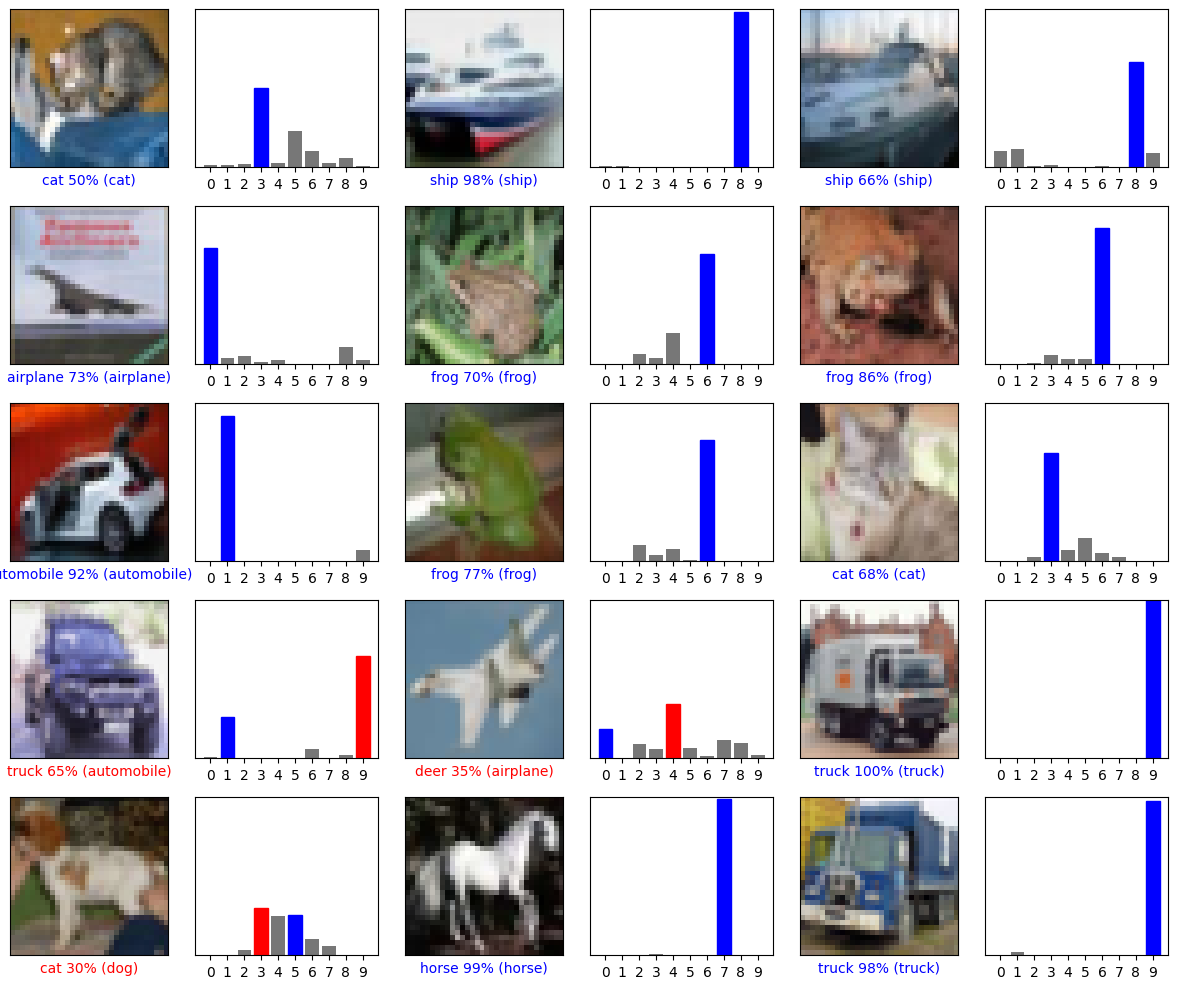

In [78]:
predictions = model.predict(X_test)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Function to plot predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    true_label = np.argmax(true_label)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 15 test images, their predicted label, and the true label
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()
